In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df_test.iloc[9]

age                40
job          services
marital       married
education     primary
default            no
balance          3559
housing           yes
loan               no
contact       unknown
day                20
month             may
duration          138
campaign            8
pdays              -1
previous            0
poutcome      unknown
Name: 9, dtype: object

In [2]:
import zipfile



In [7]:
# with zipfile.ZipFile

import zipfile
with zipfile.ZipFile("bank.zip", 'r') as zip_ref:
    zip_ref.extractall()


In [2]:
# df1 = pd.read_csv("bank.csv", sep=';')
df2 = pd.read_csv("bank-full.csv", sep=";")


In [3]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
df2.info()
categorical = ['job', 'marital', 'education', 'default',  'housing',
               'loan', 'contact', 'month', 'poutcome']

numerical = ['age', 'balance', 'day', 'duration', 
             'campaign', 'pdays','previous']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [19]:
df2.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [8]:
df2.y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [5]:
df2.y = (df2.y == 'yes').astype(int)

In [6]:
df2.y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [68]:
df2[categorical].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

In [11]:
for col in categorical:
    print(df2[col].value_counts())
    print()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

default
no     44396
yes      815
Name: count, dtype: int64

housing
yes    25130
no     20081
Name: count, dtype: int64

loan
no     37967
yes     7244
Name: count, dtype: int64

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

poutcome
unknown    36959
failure     4901

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_full_train, df_test = train_test_split(df2, test_size=.2, random_state=24)
df_train, df_val = train_test_split(df_full_train, test_size=.25, random_state=24)

In [9]:
df_full_train.y.value_counts()

y
0    31924
1     4244
Name: count, dtype: int64

In [10]:
len(df_train), len(df_val), len(df_test), len(df_full_train)

(27126, 9042, 9043, 36168)

In [11]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)



In [12]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [13]:
del df_train['y']
del df_val['y']
del df_test['y']

In [42]:
df_full_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: xlabel='previous', ylabel='Count'>

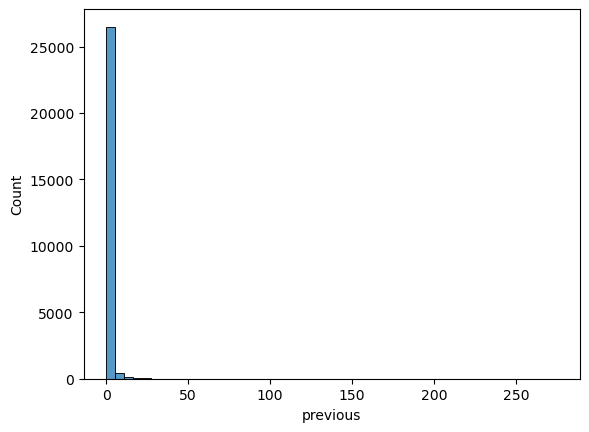

In [ ]:
# for num in numerical:
#     sns.histplot(df_train[num], bins=50)
#     print()

# sns.histplot(df_train['age'], bins=50)
# sns.histplot(df_train['age'], bins=50)
# sns.histplot(df_train['balance'], bins=50)
# sns.histplot(df_train['day'], bins=50)
# sns.histplot(df_train['duration'], bins=50)
# sns.histplot(df_train['campaign'], bins=50)
# sns.histplot(df_train['pdays'], bins=50)
# sns.histplot(df_train['previous'], bins=50)







In [47]:
df_train[numerical].describe()

,age,balance,day,duration,campaign,pdays,previous
count,27126.000000,27126.000000,27126.000000,27126.000000,27126.000000,27126.000000,27126.000000
mean,40.937108,1390.083057,15.786773,258.376981,2.776229,40.517474,0.577453
std,10.597366,3176.136432,8.344934,257.962354,3.129899,100.445045,2.484539
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,457.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1466.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,3785.000000,63.000000,808.000000,275.000000


There is a big contrast between the values in `balance`

<Axes: >

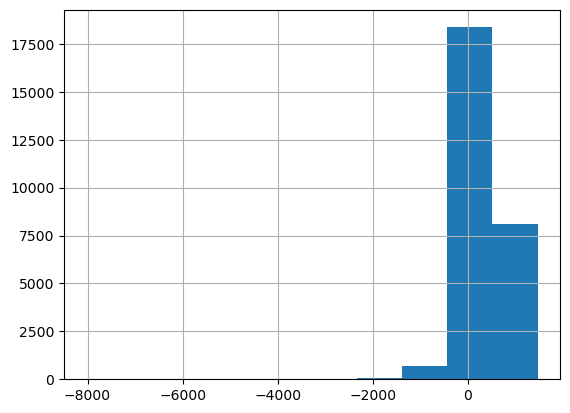

In [54]:
df_bal = df_full_train[df_full_train['balance'] <1466]
df_bal.balance.hist()

In [53]:
df_bal.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,8938.000000,8938.000000,8938.000000,8938.000000,8938.000000,8938.000000,8938.000000,8938.000000
mean,43.073059,4523.823786,15.992616,270.962967,2.648691,42.499329,0.689192,0.162229
std,11.379855,4935.542170,8.113450,263.437439,2.859722,97.253695,2.045050,0.368681
min,18.000000,1467.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,34.000000,2052.000000,9.000000,107.000000,1.000000,-1.000000,0.000000,0.000000
50%,41.000000,3052.000000,17.000000,187.000000,2.000000,-1.000000,0.000000,0.000000
75%,51.000000,5107.500000,21.000000,340.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,2770.000000,63.000000,805.000000,40.000000,1.000000


In [13]:

from IPython.display import display  


In [14]:
from sklearn.metrics import mutual_info_score

In [15]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.y)

In [16]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

poutcome     0.029008
month        0.025001
contact      0.013970
housing      0.009827
job          0.008548
loan         0.002486
education    0.002472
marital      0.002010
default      0.000202
dtype: float64

In [65]:
df_full_train[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 27401 to 899
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       36168 non-null  int64 
 1   balance   36168 non-null  int64 
 2   loan      36168 non-null  object
 3   day       36168 non-null  int64 
 4   duration  36168 non-null  int64 
 5   campaign  36168 non-null  int64 
 6   pdays     36168 non-null  int64 
 7   previous  36168 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 3.5+ MB


In [41]:
df_full_train[numerical].corrwith(df_full_train.y).sort_values(ascending=False)


duration    0.393391
pdays       0.105394
previous    0.085833
balance     0.054189
age         0.026329
day        -0.027972
campaign   -0.072275
dtype: float64

duration has like 40% correlation with the target variable


In [17]:
from sklearn.feature_extraction import DictVectorizer

In [18]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [19]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred = model.predict_proba(X_val)[:, 1]

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

In [23]:
roc_auc_score(y_val, y_pred)

0.8516401097754405

In [24]:
def train(df, y, C, s, m):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
    
    X = dv.transform(cat)

    model = LogisticRegression(solver=s, C=C, max_iter=m)
    model.fit(X, y)
    return dv, model

In [25]:
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

In [26]:
solvers = ['lbfgs', 'liblinear', 'newton-cg']
iters = [100, 200]
cs = [1, 5, 10]

In [27]:
nfolds = 5

kfold = KFold(n_splits=nfolds, shuffle=True, random_state=24)

scores = []
for C in cs:
    for s in solvers:
        for m in iters:   
            for train_idx, val_idx in kfold.split(df_full_train):
                df_train = df_full_train.iloc[train_idx].reset_index(drop=True)
                df_val = df_full_train.iloc[val_idx].reset_index(drop=True)
                y_train = df_train.y.values
                y_val = df_val.y.values
                dv, model = train(df_train, y_train, C=C, s=s, m=m)
                y_pred = predict(df_val, dv, model)
                auc = roc_auc_score(y_val, y_pred)
                scores.append((C,s,m, auc))

                print(f'C={C}, solver={s}, max_iter = {m}, auc = {auc}')

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=1, solver=lbfgs, max_iter = 100, auc = 0.8503401585739234


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=1, solver=lbfgs, max_iter = 100, auc = 0.8511353636820372


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=1, solver=lbfgs, max_iter = 100, auc = 0.8548550875462466


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=1, solver=lbfgs, max_iter = 100, auc = 0.8494781620912158


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=1, solver=lbfgs, max_iter = 100, auc = 0.848714752299087


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=1, solver=lbfgs, max_iter = 200, auc = 0.870553441825086


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=1, solver=lbfgs, max_iter = 200, auc = 0.8721065004057922


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=1, solver=lbfgs, max_iter = 200, auc = 0.8812920329823641


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=1, solver=lbfgs, max_iter = 200, auc = 0.8714611646514548


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=1, solver=lbfgs, max_iter = 200, auc = 0.8692713170610474
C=1, solver=liblinear, max_iter = 100, auc = 0.8992725285169704
C=1, solver=liblinear, max_iter = 100, auc = 0.9077168164481135
C=1, solver=liblinear, max_iter = 100, auc = 0.9082549798573498
C=1, solver=liblinear, max_iter = 100, auc = 0.9048802957840264
C=1, solver=liblinear, max_iter = 100, auc = 0.9079041692076402
C=1, solver=liblinear, max_iter = 200, auc = 0.8992725285169704
C=1, solver=liblinear, max_iter = 200, auc = 0.9077168164481135
C=1, solver=liblinear, max_iter = 200, auc = 0.9082549798573498
C=1, solver=liblinear, max_iter = 200, auc = 0.9048802957840264
C=1, solver=liblinear, max_iter = 200, auc = 0.9079041692076402
C=1, solver=newton-cg, max_iter = 100, auc = 0.8993482991335667


c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


C=1, solver=newton-cg, max_iter = 100, auc = 0.9074046685435178
C=1, solver=newton-cg, max_iter = 100, auc = 0.9075977608552368
C=1, solver=newton-cg, max_iter = 100, auc = 0.9053122458776897


c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


C=1, solver=newton-cg, max_iter = 100, auc = 0.907832519144394
C=1, solver=newton-cg, max_iter = 200, auc = 0.8993482991335667


c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


C=1, solver=newton-cg, max_iter = 200, auc = 0.9074046685435178
C=1, solver=newton-cg, max_iter = 200, auc = 0.9075977608552368
C=1, solver=newton-cg, max_iter = 200, auc = 0.9053122458776897


c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


C=1, solver=newton-cg, max_iter = 200, auc = 0.907832519144394


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=5, solver=lbfgs, max_iter = 100, auc = 0.850257031586784


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=5, solver=lbfgs, max_iter = 100, auc = 0.8564972471527651


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=5, solver=lbfgs, max_iter = 100, auc = 0.8762303531863997


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=5, solver=lbfgs, max_iter = 100, auc = 0.8528408584073516


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=5, solver=lbfgs, max_iter = 100, auc = 0.8482643804729695


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=5, solver=lbfgs, max_iter = 200, auc = 0.8707835123138287


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=5, solver=lbfgs, max_iter = 200, auc = 0.8722605305325243


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=5, solver=lbfgs, max_iter = 200, auc = 0.8848266118267748


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=5, solver=lbfgs, max_iter = 200, auc = 0.8943902378538559


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=5, solver=lbfgs, max_iter = 200, auc = 0.8698935412944993
C=5, solver=liblinear, max_iter = 100, auc = 0.8990069635403564
C=5, solver=liblinear, max_iter = 100, auc = 0.9077963398428559
C=5, solver=liblinear, max_iter = 100, auc = 0.9079324033477071
C=5, solver=liblinear, max_iter = 100, auc = 0.9051756652568141
C=5, solver=liblinear, max_iter = 100, auc = 0.9078422161454349
C=5, solver=liblinear, max_iter = 200, auc = 0.8990069635403564
C=5, solver=liblinear, max_iter = 200, auc = 0.9077963398428559
C=5, solver=liblinear, max_iter = 200, auc = 0.9079324033477071
C=5, solver=liblinear, max_iter = 200, auc = 0.9051756652568141
C=5, solver=liblinear, max_iter = 200, auc = 0.9078422161454349
C=5, solver=newton-cg, max_iter = 100, auc = 0.8992596548685196


c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


C=5, solver=newton-cg, max_iter = 100, auc = 0.9073699235088991
C=5, solver=newton-cg, max_iter = 100, auc = 0.9074901096647014
C=5, solver=newton-cg, max_iter = 100, auc = 0.9053209441015124


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


C=5, solver=newton-cg, max_iter = 100, auc = 0.9077845728614701
C=5, solver=newton-cg, max_iter = 200, auc = 0.8992596548685196


c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


C=5, solver=newton-cg, max_iter = 200, auc = 0.9073699235088991
C=5, solver=newton-cg, max_iter = 200, auc = 0.9074901096647014
C=5, solver=newton-cg, max_iter = 200, auc = 0.9053209441015124
C=5, solver=newton-cg, max_iter = 200, auc = 0.9077852911578433


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=10, solver=lbfgs, max_iter = 100, auc = 0.8502976755340358


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=10, solver=lbfgs, max_iter = 100, auc = 0.85644615151362


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=10, solver=lbfgs, max_iter = 100, auc = 0.8548302014566659


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=10, solver=lbfgs, max_iter = 100, auc = 0.8674882971875867


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=10, solver=lbfgs, max_iter = 100, auc = 0.8561823409709788


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=10, solver=lbfgs, max_iter = 200, auc = 0.8905456661414218


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=10, solver=lbfgs, max_iter = 200, auc = 0.8719710505114766


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=10, solver=lbfgs, max_iter = 200, auc = 0.8814528499097315


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=10, solver=lbfgs, max_iter = 200, auc = 0.8724929220516999


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=10, solver=lbfgs, max_iter = 200, auc = 0.8699894338603473
C=10, solver=liblinear, max_iter = 100, auc = 0.8986159724459784
C=10, solver=liblinear, max_iter = 100, auc = 0.9077978262614492
C=10, solver=liblinear, max_iter = 100, auc = 0.9081073600986997
C=10, solver=liblinear, max_iter = 100, auc = 0.9021077832076904
C=10, solver=liblinear, max_iter = 100, auc = 0.9078037872894584
C=10, solver=liblinear, max_iter = 200, auc = 0.8986159724459784
C=10, solver=liblinear, max_iter = 200, auc = 0.9077978262614492
C=10, solver=liblinear, max_iter = 200, auc = 0.9081073600986997
C=10, solver=liblinear, max_iter = 200, auc = 0.9021077832076904
C=10, solver=liblinear, max_iter = 200, auc = 0.9078037872894584
C=10, solver=newton-cg, max_iter = 100, auc = 0.8992532180442941


c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


C=10, solver=newton-cg, max_iter = 100, auc = 0.90736639326474
C=10, solver=newton-cg, max_iter = 100, auc = 0.9074780436818743
C=10, solver=newton-cg, max_iter = 100, auc = 0.9053216843758805
C=10, solver=newton-cg, max_iter = 100, auc = 0.9077745167122426
C=10, solver=newton-cg, max_iter = 200, auc = 0.8992532180442941


c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


C=10, solver=newton-cg, max_iter = 200, auc = 0.90736639326474
C=10, solver=newton-cg, max_iter = 200, auc = 0.9074780436818743
C=10, solver=newton-cg, max_iter = 200, auc = 0.9053216843758805
C=10, solver=newton-cg, max_iter = 200, auc = 0.9077745167122426


In [ ]:
C=1, solver=lbfgs, max_iter = 2000, auc = 0.9134925204727341
C=1, solver=liblinear, max_iter = 100, auc = 0.9011011187860977
C=1, solver=newton-cg, max_iter = 100, auc = 0.911309754393941
C=1, solver=newton-cg, max_iter = 2000, auc = 0.9131406453564117
C=1, solver=newton-cholesky, max_iter = 100, auc = 0.9008511909

In [28]:
columns = ["C", "solver",'max_depth', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [29]:
df_scores.sort_values(by='auc',ascending=False)

,C,solver,max_depth,auc
17,1,liblinear,200,0.908255
12,1,liblinear,100,0.908255
77,10,liblinear,200,0.908107
72,10,liblinear,100,0.908107
42,5,liblinear,100,0.907932
...,...,...,...,...
60,10,lbfgs,100,0.850298
30,5,lbfgs,100,0.850257
3,1,lbfgs,100,0.849478
4,1,lbfgs,100,0.848715


In [21]:
model = LogisticRegression(C=1, solver='liblinear', max_iter=100)
model.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

In [22]:
y_pred = model.predict_proba(X_val)[:, 1]

In [23]:
roc_auc_score(y_val, y_pred)

0.9023170994315812

In [24]:
import xgboost as xgb

In [25]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [26]:
xgb_params = { 
'eta': 0.3, 
'max_depth': 6, 
'min_child_weight': 1, 
'objective': 'binary:logistic',
'eval_metric' : 'auc',
'nthread': 8, 
'seed': 1, 
'verbosity' : 1
} 

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [38]:
y_pred = model.predict(dval)

In [39]:
y_pred[:10]

array([0.0182227 , 0.0132962 , 0.04750019, 0.09992278, 0.01603574,
       0.10118806, 0.86192477, 0.06835461, 0.01177139, 0.01798515],
      dtype=float32)

In [40]:
roc_auc_score(y_val, y_pred)

0.9248222934772223

In [41]:
watchlist = [(dtrain, 'train'), (dval, 'val')] 


In [42]:
%%capture output

xgb_params = { 
'eta': 0.3, 
'max_depth': 6, 
'min_child_weight': 1, 
'objective': 'binary:logistic',
'eval_metric' : 'auc',
'nthread': 8, 
'seed': 1, 
'verbosity' : 1
} 

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval = 5,
                  evals=watchlist)

In [43]:
s = output.stdout

In [44]:
print(s[:200])

[0]	train-auc:0.86110	val-auc:0.86234
[5]	train-auc:0.92878	val-auc:0.91756
[10]	train-auc:0.94209	val-auc:0.92534
[15]	train-auc:0.94974	val-auc:0.92991
[20]	train-auc:0.95533	val-auc:0.93074
[25]	tr


In [45]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [46]:
df_score = parse_xgb_output(output)

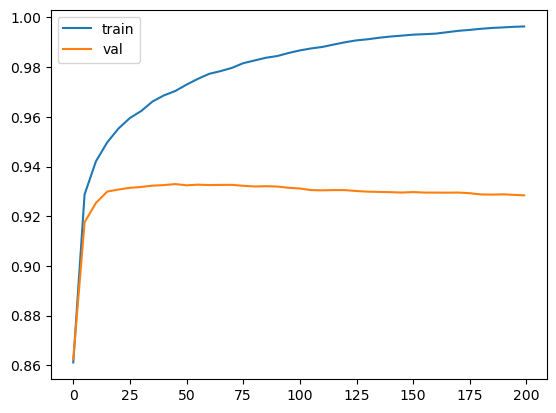

In [47]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [48]:
xgb_params = { 
'eta': 0.1, 
'max_depth': 6, 
'min_child_weight': 1, 
'objective': 'binary:logistic',
'eval_metric' : 'auc',
'nthread': 8, 
'seed': 1, 
'verbosity' : 1
} 

model = xgb.train(xgb_params, dtrain, num_boost_round=15)

In [49]:
y_pred = model.predict(dval)

In [50]:
y_pred[:10]

array([0.05405493, 0.04886333, 0.06810323, 0.13820204, 0.04945143,
       0.07910149, 0.69278175, 0.0924102 , 0.04753177, 0.05098913],
      dtype=float32)

In [51]:
roc_auc_score(y_val, y_pred)

0.9191531393502148

In [27]:
xgb_params = { 
'eta': 0.3, 
'max_depth': 6, 
'min_child_weight': 1, 
'objective': 'binary:logistic',
'eval_metric' : 'auc',
'nthread': 8, 
'seed': 1, 
'verbosity' : 1
} 

model = xgb.train(xgb_params, dtrain, num_boost_round=15)

In [28]:
y_pred = model.predict(dval)

In [54]:
y_pred[:10]

array([0.01035391, 0.00425817, 0.04041335, 0.09689914, 0.00850815,
       0.14509223, 0.8742624 , 0.06472819, 0.00366123, 0.00678029],
      dtype=float32)

In [29]:
roc_auc_score(y_val, y_pred)

0.9203647813598039

In [77]:
model

In [99]:
import pickle

In [78]:
with open('bank-model.bin', 'wb') as f_out:      
    pickle.dump((dv, model), f_out)

#### Load the model

In [100]:
with open('bank-model.bin', 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [38]:
# customer = 
df_val.iloc[9].to_dict()

{'age': 40,
 'job': 'housemaid',
 'marital': 'married',
 'education': 'secondary',
 'default': 'no',
 'balance': 0,
 'housing': 'no',
 'loan': 'no',
 'contact': 'cellular',
 'day': 19,
 'month': 'nov',
 'duration': 107,
 'campaign': 3,
 'pdays': -1,
 'previous': 0,
 'poutcome': 'unknown'}

In [43]:
y_val.dtype

dtype('int32')

In [31]:
customer = {"age": 34,
 "job": "technician",
 "marital": "married",
 "education": "secondary",
 "default": "no",
 "balance": -346,
 "housing": "yes",
 "loan": "no",
 "contact": "unknown",
 "day": 3,
 "month": "jul",
 "duration": 115,
 "campaign": 4,
 "pdays": -1,
 "previous": 0,
 "poutcome": "unknown"}

In [35]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'default=no',
       'default=yes', 'duration', 'education=primary',
       'education=secondary', 'education=tertiary', 'education=unknown',
       'housing=no', 'housing=yes', 'job=admin.', 'job=blue-collar',
       'job=entrepreneur', 'job=housemaid', 'job=management',
       'job=retired', 'job=self-employed', 'job=services', 'job=student',
       'job=technician', 'job=unemployed', 'job=unknown', 'loan=no',
       'loan=yes', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [36]:
sample = dv.transform([customer])
feature_names = dv.get_feature_names_out().tolist()

X =xgb.DMatrix(sample, feature_names=feature_names)


In [104]:
X.get_label()

array([], dtype=float32)

In [ ]:
y_pred = model.predict(X)

result = (y_pred >= 0.5).astype(int)
print(result[0])

# dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)


[0]


In [45]:
print(result[0])


0
